# 🪐 Spaceship Titanic:

> **Welcome to the year 2912**, where your data science skills are needed to solve a cosmic mystery.  
> We've received a transmission from four lightyears away — and things aren't looking good.

---

🚀 **The Spaceship Titanic** was an interstellar passenger liner launched a month ago. With almost **13,000 passengers** on board, the vessel set out on its maiden voyage, transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

🌌 While rounding **Alpha Centauri** en route to its first destination — the torrid **55 Cancri E** — the unwary Spaceship Titanic **collided with a spacetime anomaly** hidden within a dust cloud.

💥 Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, **almost half of the passengers were transported to an alternate dimension!**

---

### 🧠 Your Mission

To help rescue crews and retrieve the lost passengers, **you are challenged to predict which passengers were transported** by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them — and change history.


# 📊 Data Description: Spaceship Titanic

### 🛸 `train.csv`
Contains **personal records for approximately two-thirds (~8700)** of the passengers — used as training data.

| Column | Description |
|--------|-------------|
| `PassengerId` | A unique identifier for each passenger. Format: `gggg_pp`, where `gggg` is the group (often families) and `pp` is the passenger’s number within the group. |
| `HomePlanet` | The planet the passenger departed from (typically their permanent residence). |
| `CryoSleep` | Whether the passenger opted for suspended animation during the voyage. These passengers are confined to their cabins and don’t use ship services. |
| `Cabin` | Cabin number in the format `deck/num/side`, where side is either `P` (Port) or `S` (Starboard). |
| `Destination` | The planet the passenger was set to debark to. |
| `Age` | Passenger’s age. |
| `VIP` | Whether the passenger paid for VIP service. |
| `RoomService` | Amount spent on room service. |
| `FoodCourt` | Amount spent at the food court. |
| `ShoppingMall` | Amount spent at the shopping mall. |
| `Spa` | Amount spent at the spa. |
| `VRDeck` | Amount spent on the VR deck. |
| `Name` | First and last name of the passenger. |
| `Transported` | **Target variable** — whether the passenger was transported to another dimension (`True` or `False`). |

---

### 📁 `test.csv`
Contains personal records for the **remaining one-third (~4300)** of the passengers.  
Your task is to **predict the value of `Transported`** for each passenger in this file.

---

### 📄 `sample_submission.csv`
A sample submission file in the correct format for predictions.

| Column | Description |
|--------|-------------|
| `PassengerId` | The ID of each passenger in the test set. |
| `Transported` | Your prediction: `True` or `False`. |

---

🧠 **Goal:** Build a model that accurately predicts whether a passenger was transported to another dimension, based on available features.


In [1]:
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving train (1).csv to train (1).csv


Saving test (1).csv to test (1).csv


In [39]:
import pandas as pd
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test (1).csv")

In [40]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


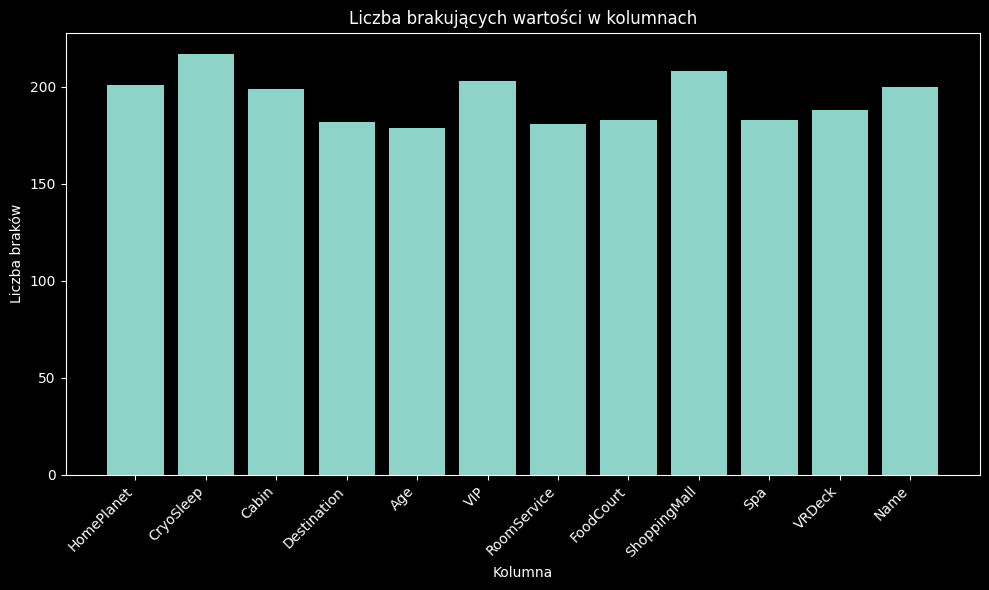

In [5]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
missing_counts = train.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Liczba brakujących wartości w kolumnach')
plt.ylabel('Liczba braków')
plt.xlabel('Kolumna')
plt.tight_layout()
plt.show()


<h1 style="color: #2c3e50; text-align: center;">Wstępne Czyszczenie danych</h1>
<p style="font-size: 16px; color: #34495e;">
  Sekcja poświęcona wstępnemu przygotowaniu danych.
</p>


In [6]:
train.dropna(inplace = True)

In [7]:
train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
train['CryoSleep'] = train['CryoSleep'].astype('bool')
train['VIP'] = train['VIP'].astype('bool')
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   bool   
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   bool   
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 535.4+ KB


<h1 style="color: #2c3e50; text-align: center;">Wizualizacja</h1>
<p style="font-size: 16px; color: #34495e;">
  Sekcja poświęcona wstępnemu wizualizowania danych.
</p>


In [9]:
import plotly.express as px
px.pie(train, names= 'Transported', title = 'Class distribution', template = 'plotly_dark')

In [10]:
import plotly.express as px

In [11]:
counts = train.groupby(['HomePlanet', 'Transported']).size().reset_index(name='count') #grupuje HomePlanet z Transported sprawdza ile ma kazda klasa czyli np Ziemia True, i dodaje do series nazwe kolumny 'count'
px.bar(
    counts,
    x = 'HomePlanet',
    y = 'count',
    color = 'Transported',
    template = 'plotly_dark',
)

In [12]:
counts = train.groupby(['Destination', 'Transported']).size().reset_index(name='count') #grupuje Destination z Transported sprawdza ile ma kazda klasa czyli np Ziemia True, i dodaje do series nazwe kolumny 'count'
px.bar(
    counts,
    x = 'Destination',
    y = 'count',
    color = 'Transported',
    template = 'plotly_dark',
)

In [13]:
cabin_f = train['Cabin'].str[0]
cabin_f
polaczenie = pd.DataFrame({"cabin_f": cabin_f, "Transported": train['Transported']})


counts = polaczenie.groupby(['cabin_f', 'Transported']).size().reset_index(name='count') #grupuje Destination z Transported sprawdza ile ma kazda klasa czyli np Ziemia True, i dodaje do series nazwe kolumny 'count'
px.bar(
    counts,
    x = 'cabin_f',
    y = 'count',
    color = 'Transported',
    template = 'plotly_dark',
)



In [14]:
train['Cabin'] = train['Cabin'].str[0] #we take only first letter of cabin num

In [15]:
train_num = train.select_dtypes(include=['number'])
train_num['Transported'] = train['Transported']
train_obj = train.select_dtypes(include = ['object'])
train_obj['Transported'] = train['Transported']

px.pie(train_obj, 'Destination', title = 'Destination distribution', template = 'plotly_dark')

In [16]:
train_num = train.select_dtypes(exclude=['object'])
train_num

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


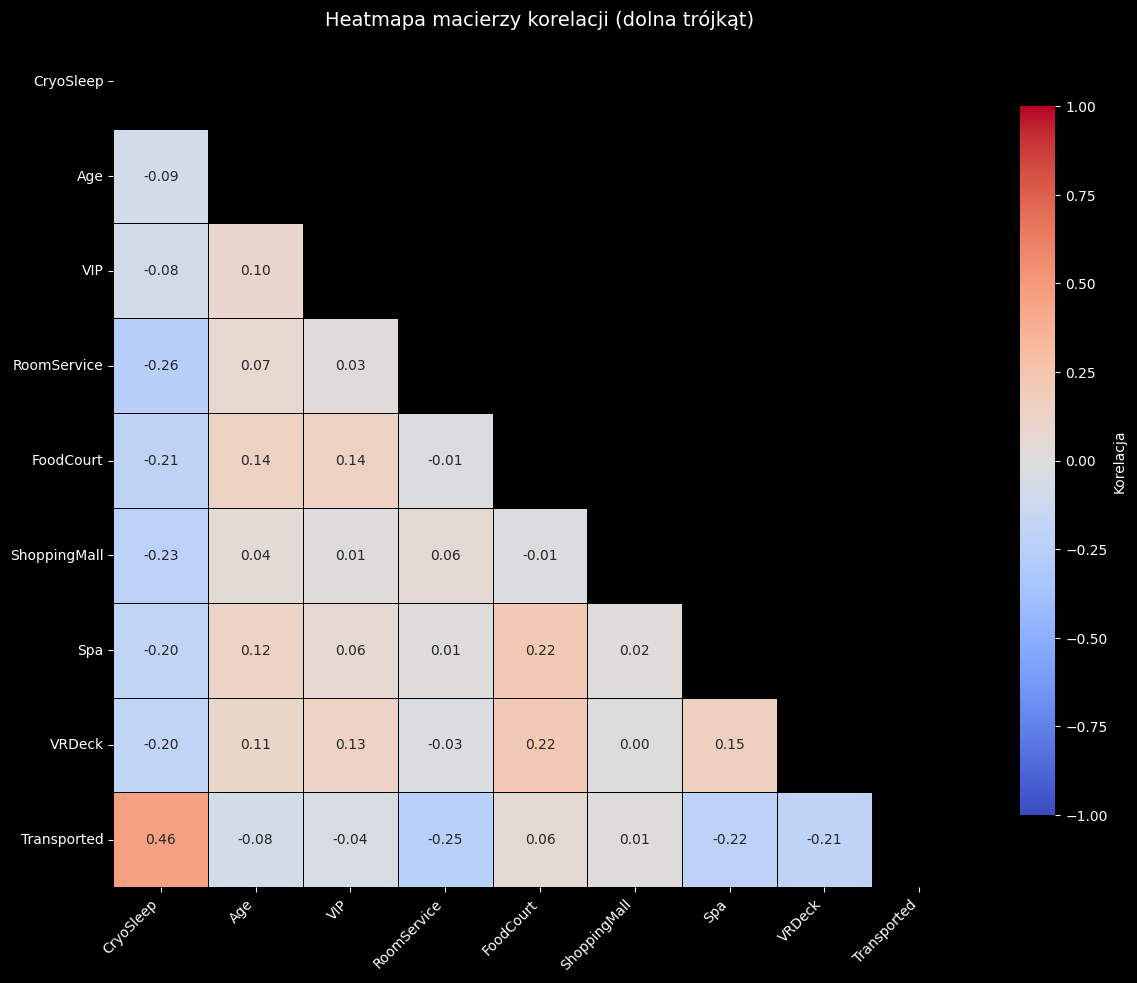

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# num_cols = train.select_dtypes(include=['number']).columns
# corr_matrix = train[num_cols].corr()

# 2. Przygotowanie maski, żeby pokazać tylko dolną trójkąt macierzy
#    (dzięki temu unikamy pokazywania korelacji dwukrotnie symetrycznie)
corr_matrix = train_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Rysunek
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,                  # maskujemy górną trójkąt
    cmap='coolwarm',            # paleta kolorów (może być też 'viridis', 'RdBu', 'rocket' itd.)
    annot=True,                 # wyświetlamy wartości korelacji wewnątrz komórek
    fmt='.2f',                  # format (2 miejsca po przecinku)
    linewidths=0.5,             # szerokość linii dzielących komórki
    linecolor='black',          # kolor linii siatki
    vmax=1.0,                   # maksymalna wartość kolorowania (korzystne do zachowania skali -1..1)
    vmin=-1.0,                  # minimalna wartość kolorowania
    center=0,                   # punkt środkowy palety kolorów (0)
    cbar_kws={                  # dodatkowe ustawienia kolorbaru
        'shrink': 0.8,          # zmniejszamy rozmiar paska
        'label': 'Korelacja'    # etykieta paska kolorów
    },
    square=True,                # wymusza kwadratowe komórki

)

plt.title('Heatmapa macierzy korelacji (dolna trójkąt)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
train_cat_cols = train.select_dtypes(exclude = 'number')
train_cat_cols.drop('Transported', axis = 1, inplace = True)

In [19]:
cat_cols = train_cat_cols.columns.tolist()
num_cols = train_num.select_dtypes(include = 'number').columns.tolist()

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(sparse_output = False, handle_unknown = "ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
],
    remainder = 'drop')

X_train = preprocessor.fit_transform(train)


In [21]:
X_train.shape

(6606, 24)

In [22]:
train.shape

(6606, 12)

In [23]:
y = train['Transported'].astype(int)
y_train = y.values
y_train.shape

(6606,)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   bool   
 2   Cabin         6606 non-null   object 
 3   Destination   6606 non-null   object 
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   bool   
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 535.4+ KB


In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predicted = model.predict(X_train)
accuracy = model.score(X_train,y_train)
print(f"LogisticRegression Accuracy: {accuracy:.4f}")


LogisticRegression Accuracy: 0.7937


In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_train, y_train)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


XGBoost Accuracy: 0.9015


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [35]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_accuracy = svc_model.score(X_train, y_train)
print(f"SVC Accuracy: {svc_accuracy:.4f}")


SVC Accuracy: 0.8065


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_train, y_train)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.9390


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_accuracy = knn_model.score(X_train, y_train)
print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.8321


In [37]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_accuracy = mlp_model.score(X_train, y_train)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")


MLP Accuracy: 0.8330
